In [1]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
x1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
y1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST Clusters\SSTA 8 Cluster Number 1901-2010.csv",index_col=0)
x2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
y2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST Clusters\SSTA 8 Cluster Number 2011-2022.csv",index_col=0)

In [3]:
x=pd.concat([x1,x2])
x=x.set_index(i for i in range(122))
y=pd.concat([y1,y2])
y=y.set_index(i for i in range(122))


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [5]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
y_pred = model.predict(x_test)
y_pred

array([0, 5, 6, 7, 6, 7, 4, 4, 6, 2, 1, 6, 2], dtype=int64)

In [7]:
y_array=y_test.values.ravel()
y_array

array([0, 0, 6, 7, 6, 7, 4, 4, 6, 2, 0, 6, 2], dtype=int64)

In [8]:
accuracy_score(y_pred,y_array)

0.8461538461538461

In [10]:
clusters=[]
for i in range(1,9):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA 8 Clusters Images\SSTA 8 Clusters Indian Rainfall Images\SSTA 8 Clusters {i} INDIAN RAINFALL.png"))
    

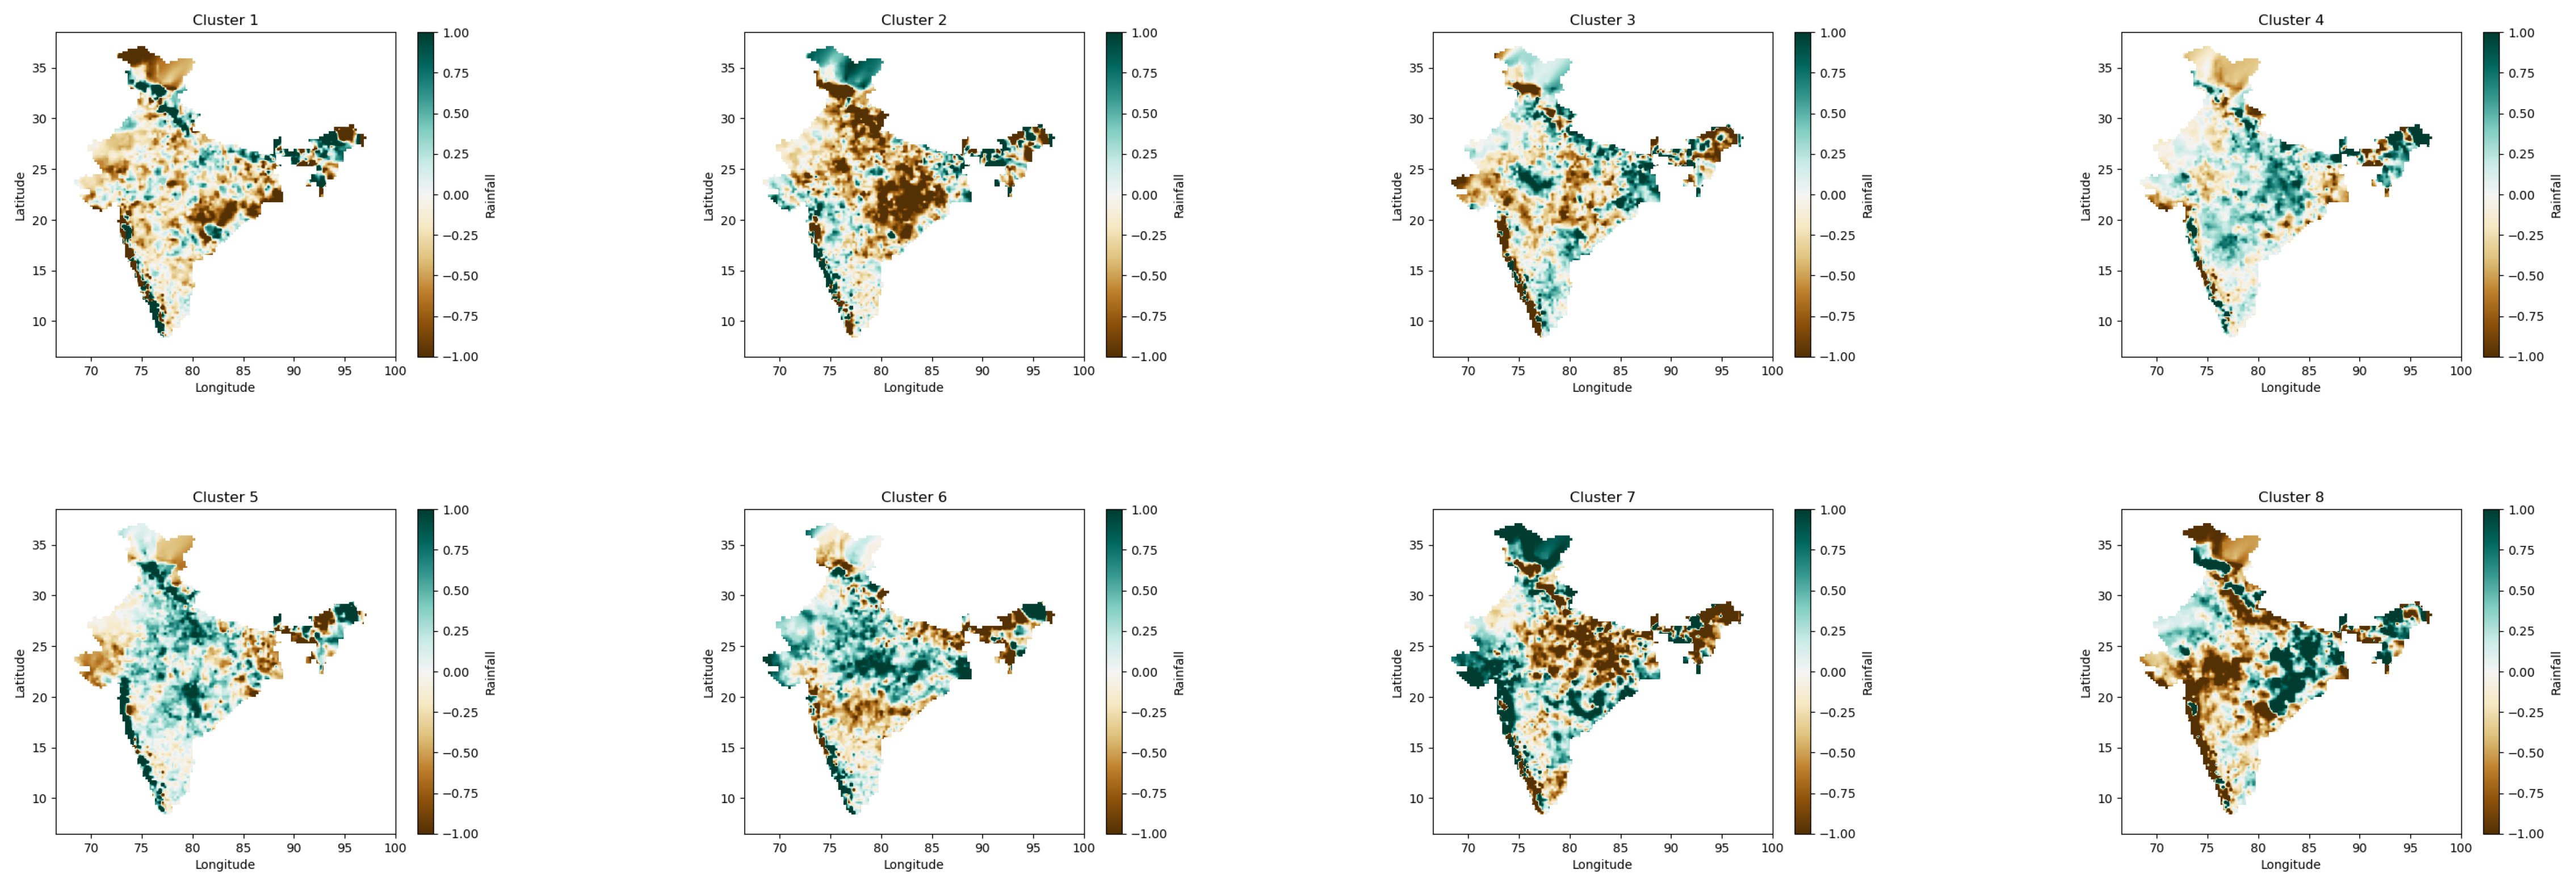

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(60, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off')

In [17]:
indexes_list = y_test.index.tolist()
indexes_list

[18, 45, 47, 89, 4, 40, 62, 107, 31, 55, 53, 119, 10]

In [18]:
actual_years_map=[]
for i in indexes_list:
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{i+1901} Rainfall.png"))
                        

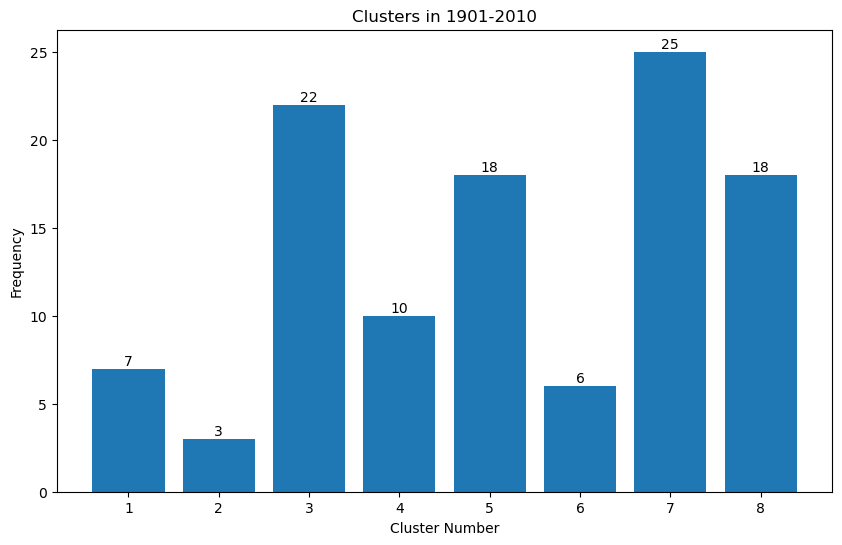

In [21]:
cluster_counts = y_train['Cluster Number'].value_counts().sort_index()

# Create a new Series with incremented index values
updated_index = cluster_counts.index + 1

# Create a new Series with the updated index values and the same data
cluster_counts = pd.Series(cluster_counts.values, index=updated_index, name="Cluster Number")


plt.figure(figsize=(10, 6))
bars1=plt.bar(cluster_counts.index, cluster_counts.values)
plt.title("Clusters in 1901-2010")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
for bar, freq in zip(bars1, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')

#plt.savefig('Clusters in 1901-2010.png')

In [22]:
cluster_counts

1     7
2     3
3    22
4    10
5    18
6     6
7    25
8    18
Name: Cluster Number, dtype: int64

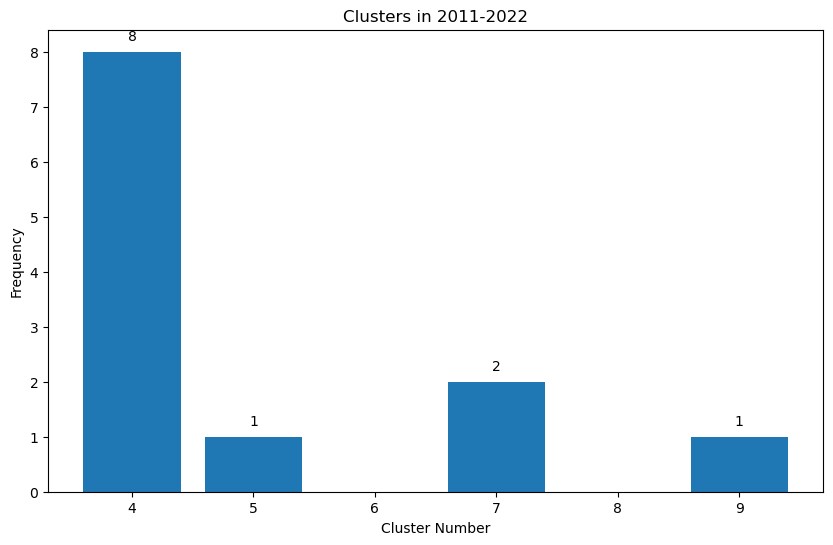

In [14]:
unique_values, value_counts = np.unique(y_pred, return_counts=True)
for i in range(len(unique_values)):
    unique_values[i]=unique_values[i]+1
    
plt.figure(figsize=(10, 6))  # Set the figure size
bars=plt.bar(unique_values, value_counts)
plt.title("Clusters in 2011-2022")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")

for bar, freq in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')
#plt.savefig('Clusters in 2011-2022.png')


In [25]:
print("Predicted Cluster",y_pred)
print("Actual Cluster",y_array)

Predicted Cluster [0 5 6 7 6 7 4 4 6 2 1 6 2]
Actual Cluster [0 0 6 7 6 7 4 4 6 2 0 6 2]


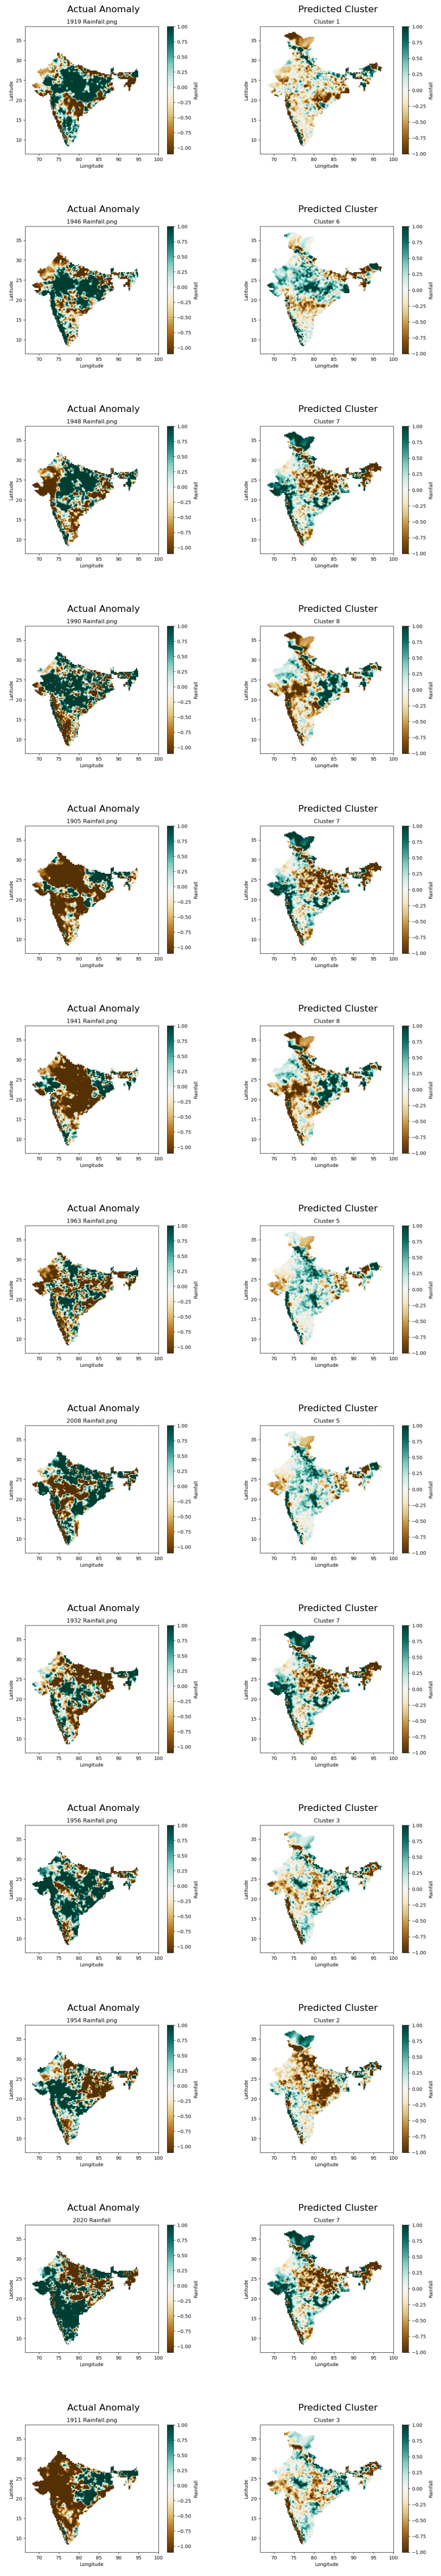

In [26]:
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')


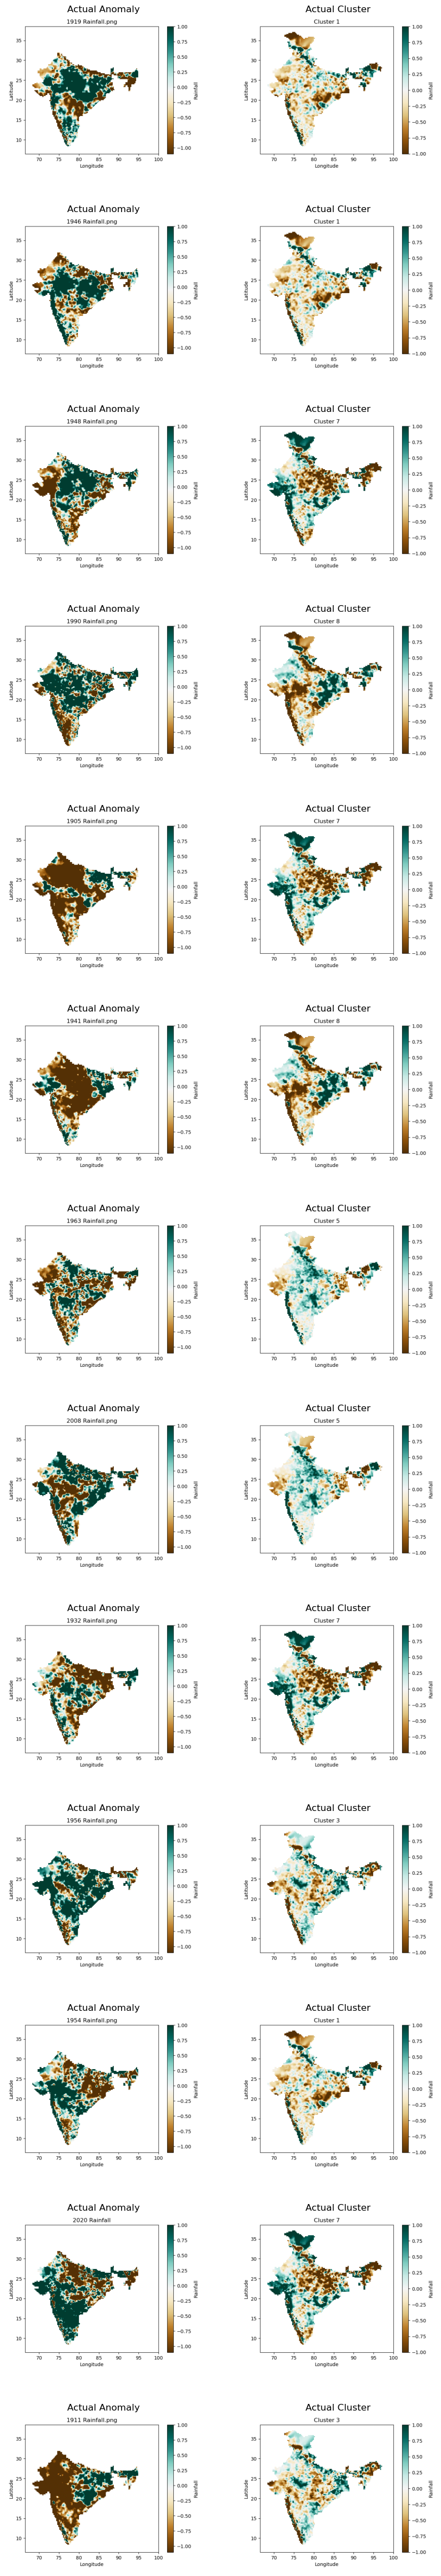

In [28]:
#Actual Years
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

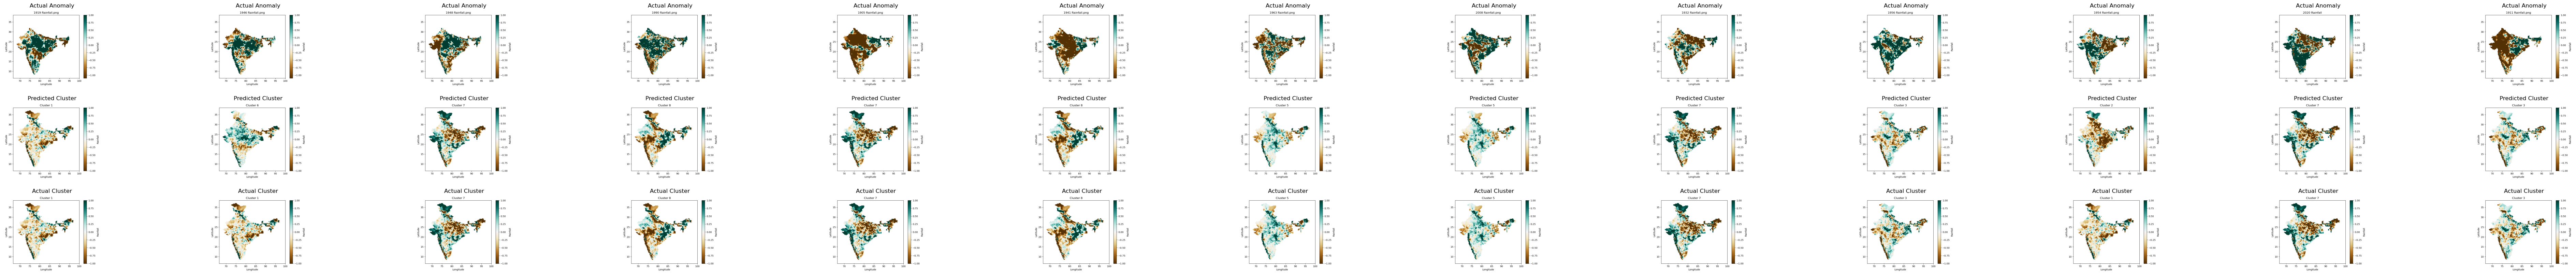

In [46]:
fig, axes = plt.subplots(3, 13, figsize=(100, 10)) 
j=0
k=0
l=0
for i, ax in enumerate(axes.ravel()):
    
   
    if(i>=0 and i<13):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')
        j+=1
        
    elif(i>=13 and i<26):
        pred_clus=y_pred[k]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        k+=1
    elif(i>=26):
        pred_clus=y_array[l]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        l+=1
        
#     print(i,j,k,l)

# plt.savefig('SSTA 8 Clusters Train Test Split Prediction.png')
